# Pandas – Lesvoorbeeld 5.

## Merging Dataframes


In [1]:
import numpy as np
import pandas as pd

Het samenvoegen van gegevens uit meerdere dataframes tot één geheel

In [45]:
# Staff en student gegevens, waarbij een student ook staff (=student-assistent) kan zijn
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR'},
                         {'Name': 'Kelly', 'Role': 'Course liasion'},
                         {'Name': 'James', 'Role': 'Grader'}])
# zorgen voor de index op Name
staff_df = staff_df.set_index('Name')
print(staff_df)

student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business'},
                           {'Name': 'Mike', 'School': 'Law'},
                           {'Name': 'Kelly', 'School': 'Engineering'}])
student_df = student_df.set_index('Name')
print(student_df)

                 Role
Name                 
Kelly  Director of HR
Kelly  Course liasion
James          Grader
            School
Name              
James     Business
Mike           Law
Kelly  Engineering


Op vergelijkbare wijze als bij SQL zijn er 4 join mogelijkheden

In [47]:
pd.merge(staff_df, student_df, how='outer', left_index=True, right_index=True)

Role       School
Name                              
James          Grader     Business
Kelly  Director of HR  Engineering
Kelly  Course liasion  Engineering
Mike              NaN          Law

In [4]:
pd.merge(staff_df, student_df, how='inner', left_index=True, right_index=True)

Role       School
Name                              
Sally  Course liasion  Engineering
James          Grader     Business

In [5]:
pd.merge(staff_df, student_df, how='left', left_index=True, right_index=True)

Role       School
Name                              
Kelly  Director of HR          NaN
Sally  Course liasion  Engineering
James          Grader     Business

In [6]:
pd.merge(staff_df, student_df, how='right', left_index=True, right_index=True)

Role       School
Name                              
James          Grader     Business
Mike              NaN          Law
Sally  Course liasion  Engineering

In [7]:
# merging is ook mgeljk zonder index, maar door het aangeven van de kolomnamen
staff_df = staff_df.reset_index()
student_df = student_df.reset_index()
pd.merge(staff_df, student_df, how='left', left_on='Name', right_on='Name')

Name            Role       School
0  Kelly  Director of HR          NaN
1  Sally  Course liasion  Engineering
2  James          Grader     Business

In [8]:
# Wanneer er bij het mergen 'identieke' kolommen in beide dataframes staan, dan worden de voorzien van een postfix
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR', 'Location': 'State Street'},
                         {'Name': 'Sally', 'Role': 'Course liasion', 'Location': 'Washington Avenue'},
                         {'Name': 'James', 'Role': 'Grader', 'Location': 'Washington Avenue'}])

student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business', 'Location': '1024 Billiard Avenue'},
                           {'Name': 'Mike', 'School': 'Law', 'Location': 'Fraternity House #22'},
                           {'Name': 'Sally', 'School': 'Engineering', 'Location': '512 Wilson Crescent'}])

pd.merge(staff_df, student_df, how='left', left_on='Name', right_on='Name')

Name            Role         Location_x       School            Location_y
0  Kelly  Director of HR       State Street          NaN                   NaN
1  Sally  Course liasion  Washington Avenue  Engineering   512 Wilson Crescent
2  James          Grader  Washington Avenue     Business  1024 Billiard Avenue

In [9]:
# Merging kan ook op meerdere kolommen 
staff_df = pd.DataFrame([{'First Name': 'Kelly', 'Last Name': 'Desjardins', 'Role': 'Director of HR'},
                         {'First Name': 'Sally', 'Last Name': 'Brooks', 'Role': 'Course liasion'},
                         {'First Name': 'James', 'Last Name': 'Wilde', 'Role': 'Grader'}])
student_df = pd.DataFrame([{'First Name': 'James', 'Last Name': 'Hammond', 'School': 'Business'},
                           {'First Name': 'Mike', 'Last Name': 'Smith', 'School': 'Law'},
                           {'First Name': 'Sally', 'Last Name': 'Brooks', 'School': 'Engineering'}])
pd.merge(staff_df, student_df, how='inner', left_on=['First Name','Last Name'], right_on=['First Name','Last Name'])

First Name Last Name            Role       School
0      Sally    Brooks  Course liasion  Engineering

# Date Functionality in Pandas

Pandas heeft de volgende datastructuren voor datum en tijd functionaliteiten
- Timestamp: weergave van een datum-tijd punt
- Period: verzameling van datums of tijd van een bepaald type: bijv. Dagen, Minuten, Nanoseconden
- TimeDelta: weergave van de tijdsduur tussen 2 datum-tijd waarden

### Timestamp

In [10]:
# Vormen van een timestamp (datum en tijd punt) uit een tekst.
pd.Timestamp('9/1/2016 10:05AM')

Timestamp('2016-09-01 10:05:00')

In [11]:
# aanmaken van een reeks van timestamps uren 
pd.date_range('2016-01-09 00:00:00', periods = 6, freq = 'H')

DatetimeIndex(['2016-01-09 00:00:00', '2016-01-09 01:00:00',
               '2016-01-09 02:00:00', '2016-01-09 03:00:00',
               '2016-01-09 04:00:00', '2016-01-09 05:00:00'],
              dtype='datetime64[ns]', freq='H')

### Period

In [12]:
# aanmaken van een periode van het type Maand
pd.Period('1/2016')

Period('2016-01', 'M')

In [13]:
pd.Period('3/5/2016')

Period('2016-03-05', 'D')

In [14]:
# aanmaken van een reeks van perioden van het type Maand
pd.period_range('2016-01',periods=6, freq='M')

PeriodIndex(['2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06'], dtype='period[M]', freq='M')

### DatetimeIndex

In [15]:
# Aanmaken van een Series, waarbij de indes een timestamp is
t1 = pd.Series(list('abc'), [pd.Timestamp('2016-09-01'), pd.Timestamp('2016-09-02'), pd.Timestamp('2016-09-03')])
t1

2016-09-01    a
2016-09-02    b
2016-09-03    c
dtype: object

In [16]:
type(t1.index)

pandas.core.indexes.datetimes.DatetimeIndex

### PeriodIndex

In [17]:
# Aanmaken van een Series, waarbij de index een periode is
t2 = pd.Series(list('def'), [pd.Period('2016-09'), pd.Period('2016-10'), pd.Period('2016-11')])
t2

2016-09    d
2016-10    e
2016-11    f
Freq: M, dtype: object

In [18]:
type(t2.index)

pandas.core.indexes.period.PeriodIndex

### Converting to Datetime

In [19]:
# Vullen van een dataframe, waarbij de datums als verschillende soorten tekst in de index gezet worden:
d1 = ['2 June 2013', 'Aug 29, 2014', '2015-06-26', '7/12/16']
ts3 = pd.DataFrame(np.random.randint(10, 100, (4,2)), index=d1, columns=list('ab'))
ts3

a   b
2 June 2013   55  94
Aug 29, 2014  36  65
2015-06-26    59  42
7/12/16       52  10

In [20]:
# Omvormen van de index van teksten naar een index met timestamps
ts3.index = pd.to_datetime(ts3.index)
ts3

a   b
2013-06-02  55  94
2014-08-29  36  65
2015-06-26  59  42
2016-07-12  52  10

In [21]:
pd.to_datetime('4.7.12', dayfirst=True)

Timestamp('2012-07-04 00:00:00')

### Timedeltas

In [22]:
# Berekenen van de tijdsduur tussen 2 datums (Amerikaanse notatie !) 
pd.Timestamp('9/3/2016')-pd.Timestamp('9/1/2016')

Timedelta('2 days 00:00:00')

In [23]:
# Berekenen van een timestamp door optellen met een TimeDelta
pd.Timestamp('9/2/2016 8:10AM') + pd.Timedelta('12D 3H')

Timestamp('2016-09-14 11:10:00')

### Working with Dates in a Dataframe

In [24]:
# aanmaken van een reeks van timestamps (1x per 14 dagen)
dates = pd.date_range('10-01-2016', periods=9, freq='2W-SUN')
dates

DatetimeIndex(['2016-10-02', '2016-10-16', '2016-10-30', '2016-11-13',
               '2016-11-27', '2016-12-11', '2016-12-25', '2017-01-08',
               '2017-01-22'],
              dtype='datetime64[ns]', freq='2W-SUN')

In [25]:
# aanmaken van een datafram uit 2 dictionary lijsten met als index de reeks van timestamps
df = pd.DataFrame({'Count 1': 100 + np.random.randint(-5, 10, 9).cumsum(),
                  'Count 2': 120 + np.random.randint(-5, 10, 9)}, index=dates)
df

Count 1  Count 2
2016-10-02       95      118
2016-10-16       98      118
2016-10-30       94      122
2016-11-13       95      115
2016-11-27       96      115
2016-12-11       98      122
2016-12-25      101      117
2017-01-08      107      120
2017-01-22      103      122

In [26]:
# Tonen van dagnamen van de index
df.index.weekday_name

Index(['Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday',
       'Sunday', 'Sunday'],
      dtype='object')

In [27]:
# Berekenen van de verschillen tussen 2 opeenvolgende rijen
df.diff()

Count 1  Count 2
2016-10-02      NaN      NaN
2016-10-16      3.0      0.0
2016-10-30     -4.0      4.0
2016-11-13      1.0     -7.0
2016-11-27      1.0      0.0
2016-12-11      2.0      7.0
2016-12-25      3.0     -5.0
2017-01-08      6.0      3.0
2017-01-22     -4.0      2.0

In [28]:
# Omvormen naar maand weergave en dan gemiddelde berekenen
df.resample('M').mean()

Count 1     Count 2
2016-10-31   95.666667  119.333333
2016-11-30   95.500000  115.000000
2016-12-31   99.500000  119.500000
2017-01-31  105.000000  121.000000

In [29]:
# selecteren van het jaar 2017
df['2017']

Count 1  Count 2
2017-01-08      107      120
2017-01-22      103      122

In [30]:
# selecteren van december 2016
df['2016-12']

Count 1  Count 2
2016-12-11       98      122
2016-12-25      101      117

In [31]:
# selecteren vanaf december 2016 tot einde van de reeks
df['2016-12':]

Count 1  Count 2
2016-12-11       98      122
2016-12-25      101      117
2017-01-08      107      120
2017-01-22      103      122

In [32]:
# Omvormen naar maand weergave en dan de waarde opvullen 'forward fill'
df.asfreq('W', method='ffill')

Count 1  Count 2
2016-10-02       95      118
2016-10-09       95      118
2016-10-16       98      118
2016-10-23       98      118
2016-10-30       94      122
2016-11-06       94      122
2016-11-13       95      115
2016-11-20       95      115
2016-11-27       96      115
2016-12-04       96      115
2016-12-11       98      122
2016-12-18       98      122
2016-12-25      101      117
2017-01-01      101      117
2017-01-08      107      120
2017-01-15      107      120
2017-01-22      103      122

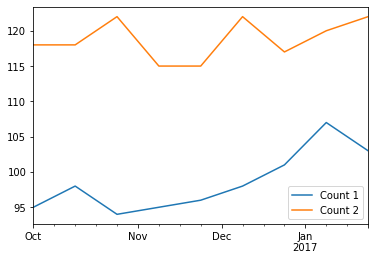

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

df.plot()

In [34]:
# Einde

In [35]:
# Staff en student gegevens, waarbij een student ook staff (=student-assistent) kan zijn
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR'},
                         {'Name': 'Kelly', 'Role': 'Course liasion'},
                         {'Name': 'James', 'Role': 'Grader'}])
# zorgen voor de index op Name
staff_df = staff_df.set_index('Name')
print(staff_df)

student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business'},
                           {'Name': 'Mike', 'School': 'Law'},
                           {'Name': 'Kelly', 'School': 'Engineering'}])
student_df = student_df.set_index('Name')
print(student_df)

                 Role
Name                 
Kelly  Director of HR
Kelly  Course liasion
James          Grader
            School
Name              
James     Business
Mike           Law
Kelly  Engineering


In [36]:
pd.merge(staff_df, student_df, how='outer', left_index=True, right_index=True)

Role       School
Name                              
James          Grader     Business
Kelly  Director of HR  Engineering
Kelly  Course liasion  Engineering
Mike              NaN          Law